<a href="https://colab.research.google.com/github/fsndzomga/Deep-Learning-With-Python/blob/main/Image_classification_using_Convolutional_Neural_Networks_(CNNs)_with_TensorFlow_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Preprocessing the data
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 4s 0us/step


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
782/782 [==============================] - 84s 105ms/step - loss: 1.5579 - accuracy: 0.4352 - val_loss: 1.3141 - val_accuracy: 0.5274
Epoch 2/10
782/782 [==============================] - 81s 104ms/step - loss: 1.1909 - accuracy: 0.5785 - val_loss: 1.2019 - val_accuracy: 0.5752
Epoch 3/10
782/782 [==============================] - 81s 103ms/step - loss: 1.0393 - accuracy: 0.6353 - val_loss: 0.9979 - val_accuracy: 0.6489
Epoch 4/10
782/782 [==============================] - 82s 104ms/step - loss: 0.9367 - accuracy: 0.6729 - val_loss: 0.9418 - val_accuracy: 0.6717
Epoch 5/10
782/782 [==============================] - 79s 101ms/step - loss: 0.8568 - accuracy: 0.7014 - val_loss: 0.9156 - val_accuracy: 0.6825
Epoch 6/10
782/782 [==============================] - 79s 101ms/step - loss: 0.7983 - accuracy: 0.7212 - val_loss: 0.8873 - val_accuracy: 0.6927
Epoch 7/10
782/782 [==============================] - 79s 100ms/step - loss: 0.7531 - accuracy: 0.7382 - val_loss: 0.8502 - val_ac

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)


313/313 - 4s - loss: 0.8627 - accuracy: 0.7123 - 4s/epoch - 13ms/step

Test accuracy: 0.7123000025749207
313/313 [==============================] - 5s 17ms/step


1/1 [==============================] - 0s 38ms/step


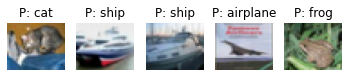

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# get the predictions of the model on the 20 images
predictions = model.predict(test_images[:20])

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# loop over the 5 images and predictions
for i in range(5):
    # plot the image
    plt.subplot(4, 5, i+1)
    plt.imshow(test_images[i], cmap='gray', aspect='auto')
    plt.axis('off')
    
    # plot the prediction as title
    prediction = np.argmax(predictions[i])
    plt.title(f"P: {class_names[prediction]}")
    
# show the plot
plt.show()


